# Exploração e pré-processamento "*bruto*" dos dados 

Aqui vamos visualizar os dados de maneiras superficial, discretizar algumas variáveis e remover outras com pouca variância ou muitos valores ausentes.

In [1]:
from fonte_dados import FonteDados
from preprocessamento import *
from visualizacao import Visualizacao

In [2]:
fonte = FonteDados()
preproc = Preprocessamento()
viz = Visualizacao()

configuraJupyter()

In [3]:
df = fonte.leitura_dados()

Dimensões: (462298, 180)


In [4]:
df.head()

,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a6984c3ae39509

In [5]:
explora = dfExploracao(df)

In [6]:
explora.head()

,colunas,tipos,na_perct
0,fl_matriz,bool,0.0
1,de_natureza_juridica,object,0.0
2,sg_uf,object,0.0
3,natureza_juridica_macro,object,0.0
4,de_ramo,object,0.0


In [7]:
#viz.visualizaVarsExplor(df)

# Pré-processamento dos dados - 1

* remoção de colunas com mais de 10% de missings
* classes de categóricos nominais com baixa contagem serão agrupados como 'OUTROS' ou agrupados com a menor contagem
* colunas com variância muito baixa (desbalanceamento muito alto) serão removidas (exe: coluna booleana com 10% de TRUE)

In [8]:
print('Quantidade de colunas removidas por completude:', explora[explora['na_perct'] > .10].shape[0], '\n')

Quantidade de colunas removidas por completude: 143 



In [9]:
df = preproc.processo_part1(df, perc_miss=.10)

Remoção das colunas 

Categorizando categóricas nominais como OUTROS 

Manipulação de colunas especificas 

Transformando colunas binárias 



In [10]:
df.shape

(462298, 24)

In [11]:
preproc.proc_part1['limitesRenom_outros']

{'de_natureza_juridica': 29000.0,
 'natureza_juridica_macro': 4000.0,
 'de_ramo': 21000.0,
 'setor': 30000.0,
 'nm_divisao': 14000.0,
 'nm_segmento': 20000.0}

In [12]:
preproc.proc_part1['cols_manipu']

['fl_rm',
 'de_saude_tributaria',
 'de_nivel_atividade',
 'de_faixa_faturamento_estimado',
 'de_faixa_faturamento_estimado_grupo',
 'idade_emp_cat',
 'de_saude_rescencia',
 'vl_faturamento_estimado_aux',
 'vl_faturamento_estimado_grupo_aux',
 'qt_filiais',
 'vl_total_veiculos_leves_grupo',
 'vl_total_veiculos_pesados_grupo',
 'nu_meses_rescencia']

In [13]:
df['setor'].value_counts()

COMERCIO     211224
SERVIÇO      189644
INDUSTRIA     30893
OUTROS        28610
Name: setor, dtype: int64

In [14]:
df['idade_emp_cat'].value_counts()

1    138580
2    116100
5     75572
3     49205
0     46794
4     36047
Name: idade_emp_cat, dtype: int64

In [15]:
df.head()

,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,fl_mei,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
id,,,,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,OUTROS,3,0,1,1,1,OUTROS,CONSTRUCAO,0,0,VERDE,1,1.0,2.0,1,2.0,2.0,2.0,2.0,0
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1,1,1,1,1,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,0,0,CINZA,0,0.0,0.0,1,1.0,1.0,1.0,1.0,0
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,EMPRESARIO INDIVIDUAL,AM,OUTROS,OUTROS,SERVIÇO,2,1,0,1,1,OUTROS,OUTROS,0,0,AMARELO,1,1.0,1.0,1,0.0,0.0,0.0,0.0,0
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,2,0,1,1,1,OUTROS,OUTRAS ATIVIDADES DE SERVICOS,0,0,AMARELO,1,1.0,1.0,1,1.0,1.0,1.0,1.0,0
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,EMPRESARIO INDIVIDUAL,RN,OUTROS,OUTROS,SERVIÇO,1,0,1,1,1,OUTROS,OUTROS,0,0,VERDE,1,1.0,2.0,1,1.0,1.0,1.0,1.0,0


In [16]:
explora = dfExploracao(df, quantUnicos=True)
explora.sort_values(['tipos','na_perct','quantUnicos']).head()

,colunas,tipos,na_perct,quantUnicos
6,fl_mei,int32,0.0,2
7,fl_email,int32,0.0,2
8,fl_telefone,int32,0.0,2
9,fl_rm,int32,0.0,2
12,vl_total_veiculos_pesados_grupo,int32,0.0,2


In [17]:
#viz.visualizaVarsExplor(df)

In [18]:
df.describe()

,idade_emp_cat,fl_mei,fl_email,fl_telefone,fl_rm,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
count,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,417022.000000,451130.000000,462298.000000,433612.000000,434785.000000,434785.000000,434785.000000,462298.000000
mean,2.250589,0.326413,0.445751,0.725653,0.487822,0.045291,0.082453,0.917583,1.015412,1.158068,0.576831,0.913828,0.967678,0.883775,0.944768,0.095728
std,1.591043,0.468901,0.497049,0.446185,0.499852,0.207942,0.275054,0.274999,0.475403,0.701354,0.494062,0.600828,0.646510,0.641716,0.682649,0.294219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [19]:
explora.sort_values(['tipos','na_perct','quantUnicos']).head()

,colunas,tipos,na_perct,quantUnicos
6,fl_mei,int32,0.0,2
7,fl_email,int32,0.0,2
8,fl_telefone,int32,0.0,2
9,fl_rm,int32,0.0,2
12,vl_total_veiculos_pesados_grupo,int32,0.0,2


In [20]:
print('Porcentagem das linhas com pelo menos 1 missing:', (df.isnull().any(axis=1).mean()*100).round(1) ,'% \n')

Porcentagem das linhas com pelo menos 1 missing: 10.1 % 



In [21]:
df.shape

(462298, 24)

In [22]:
explora.sort_values(['tipos','na_perct','quantUnicos'], ascending=False).head()

,colunas,tipos,na_perct,quantUnicos
14,de_saude_tributaria,object,0.032124,5
10,nm_divisao,object,0.004168,8
11,nm_segmento,object,0.004168,7
4,setor,object,0.004168,4
3,de_ramo,object,0.000000,8


In [23]:
#viz.missings_viz(df, escolhido_tipo=1)

In [24]:
# correlacao dos missings 
#viz.missings_viz(df, escolhido_tipo=3)

In [25]:
# cols_corr = explora[(explora['tipos'] != 'int32') & (explora['tipos'] != 'object')]['colunas']
# viz.correlacao_viz(df, colunas=cols_corr, anotado=True)

# Visualizando variáveis numéricas

In [26]:
#df['nm_micro_regiao'].value_counts()

In [27]:
#df['nm_micro_regiao'].mode()

In [28]:
#df[cols_corr].describe()

In [29]:
# import matplotlib.pyplot as plt

# for col in cols_corr:
#     print(col)
#     df[col].hist()
#     plt.show()
#     print('\n')
# #     print(col)
# #     print(df[col].value_counts())
# #     print('\n')

In [30]:
df['nu_meses_rescencia'].value_counts()

1.0    322673
2.0     50388
0.0     43961
Name: nu_meses_rescencia, dtype: int64

In [31]:
df.shape

(462298, 24)

In [32]:
explora.sort_values(['tipos','na_perct'])

,colunas,tipos,na_perct,quantUnicos
6,fl_mei,int32,0.000000,2
7,fl_email,int32,0.000000,2
8,fl_telefone,int32,0.000000,2
9,fl_rm,int32,0.000000,2
12,vl_total_veiculos_pesados_grupo,int32,0.000000,2
13,vl_total_veiculos_leves_grupo,int32,0.000000,2
15,de_saude_rescencia,int32,0.000000,2
18,fl_passivel_iss,int32,0.000000,2
23,qt_filiais,int32,0.000000,2
5,idade_emp_cat,int64,0.000000,6


In [33]:
explora[explora['tipos'] == 'object']['colunas']

0        de_natureza_juridica
1                       sg_uf
2     natureza_juridica_macro
3                     de_ramo
4                       setor
10                 nm_divisao
11                nm_segmento
14        de_saude_tributaria
Name: colunas, dtype: object

# Pré-processamento dos dados - 2

## Preenchimentos dos missings

Tipos das colunas e respectivos preenchimentos:

* objeto - moda
* float - mediana 

## Codificação One-hot-encoder

Codificação das variáveis dummies correspondentes as categóricas nominais.

## Normalização 

Será feita a normalização (MinMaxScale) dos dados antes da PCA.

## Redução de dimensionalidade (PCA)

PCA com 95% da variância explicada.


In [34]:
teste = df.iloc[0:5, :]

In [35]:
df = preproc.processo_part2(df)

Salvando tipo das variáveis 

Preenchimento dos missings das numéricas 

Preenchimento dos missings das categoricas 

Codificação one-hot-encoder 

Normalização das numéricas 

Redução de dimensionalidade 



In [36]:
df.shape

(462298, 27)

In [37]:
teste.shape

(5, 24)

In [38]:
teste.head(10)

,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,fl_mei,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
id,,,,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,OUTROS,3,0,1,1,1,OUTROS,CONSTRUCAO,0,0,VERDE,1,1.0,2.0,1,2.0,2.0,2.0,2.0,0
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1,1,1,1,1,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,0,0,CINZA,0,0.0,0.0,1,1.0,1.0,1.0,1.0,0
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,EMPRESARIO INDIVIDUAL,AM,OUTROS,OUTROS,SERVIÇO,2,1,0,1,1,OUTROS,OUTROS,0,0,AMARELO,1,1.0,1.0,1,0.0,0.0,0.0,0.0,0
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,2,0,1,1,1,OUTROS,OUTRAS ATIVIDADES DE SERVICOS,0,0,AMARELO,1,1.0,1.0,1,1.0,1.0,1.0,1.0,0
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,EMPRESARIO INDIVIDUAL,RN,OUTROS,OUTROS,SERVIÇO,1,0,1,1,1,OUTROS,OUTROS,0,0,VERDE,1,1.0,2.0,1,1.0,1.0,1.0,1.0,0


In [39]:
teste = preproc.processo_part2(teste, etapa_treino=False)

Preenchimento dos missings das numéricas 

Preenchimento dos missings das categoricas 

Codificação one-hot-encoder 

Normalização pré PCA 

Redução de dimensionalidade 



In [40]:
teste.shape

(5, 27)

In [41]:
#proj_treino, linhas = preproc.reducao_viz(df)

In [42]:
#proj_treino.shape

In [43]:
#proj_teste = preproc.reducao_viz(teste, etapa_treino=False)

In [44]:
#proj_teste.shape

# Treinamento dos modelos

Após o pré-processamento, utilizaremos mais 2 modelos de **aprendizado não-supervisionado**.

* clusterização: k-medoids (variação do k-means)
* recomendação: knn

Um deles será para fazer uma **clusterização** no banco de dados, ou seja, gerar possíveis grupos e visualiza-los em 2 dimensões (nnovamente PCA). Será utilizado o **K-medoids**, uma variação do k-means em que o centróide de inicialização começa em algum dos pontos.

Para **recomendação** será utilizado o **KNN** para identificar os vizinhos próximos aos do portfólio do usuário.

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


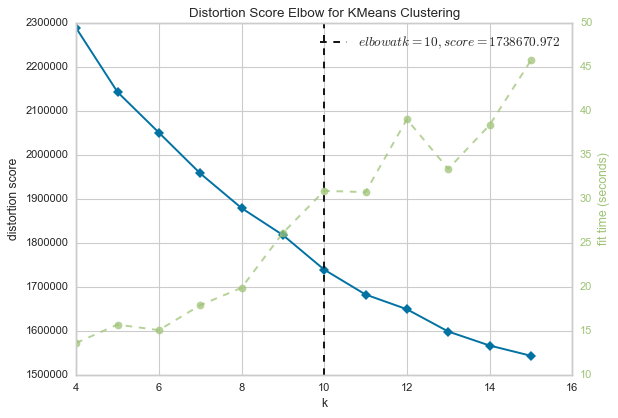

In [45]:
viz.defineClusters(df)

Com o método do "cotovelo" ("*elbow*") aplicado com o k-means, vemos que o número mais adequado de clusters é _k = 10_

In [ ]:
# K-medoids

In [46]:
from sklearn_extra.cluster import KMedoids

ModuleNotFoundError: No module named 'sklearn_extra'